<h1 style='color:red' align='center'> Maps and Hash Tables<h1>

<h1 style='color:green' > Maps and Dictionaries<h1>

>Map is dictionary like data structure. It is a sequence of (key, value) pair, where only single value is associated with each unique key.

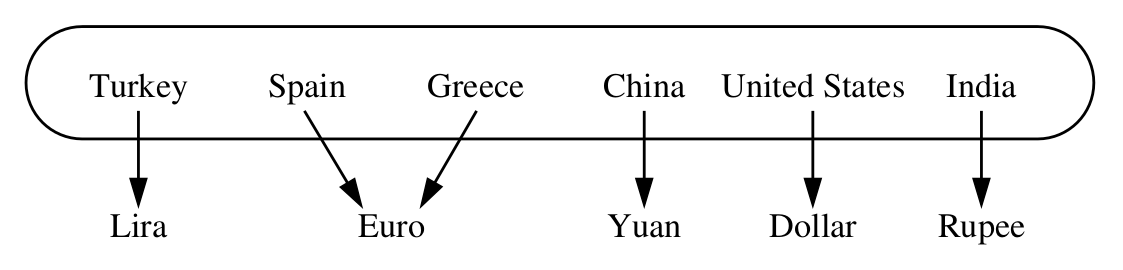

` Common applications of maps.`
- A university’s information system relies on some form of a student ID as a
  key that is mapped to that student’s associated record (such as the student’s
  name, address, and course grades) serving as the value.
- A computer graphics system may map a color name, such as turquoise ,
  to the triple of numbers that describes the color’s RGB (red-green-blue) rep-
  resentation, such as (64,224,208).
- A social media site typically relies on a (nonnumeric) username as a key that
  can be efﬁciently mapped to a particular user’s associated information.
- Python uses a dictionary to represent each namespace, mapping an identifying
  string, such as pi , to an associated object, such as 3.14159.

<h6> The Map ADT<h6>

- <b> M[k]: </b> Return the value v associated with key k in map M, if
  one exists; otherwise raise a KeyError. In Python, this is
  implemented with the special method getitem .
- <b> M[k] = v: </b> Associate value v with key k in map M, replacing the ex-
  isting value if the map already contains an item with key
  equal to k. In Python, this is implemented with the special
  method setitem .
- <b> del M[k]: </b> Remove from map M the item with key equal to k; if M
  has no such item, then raise a KeyError. In Python, this is
  implemented with the special method delitem .
- <b> len(M): </b> Return the number of items in map M. In Python, this is
  implemented with the special method len .
- <b> iter(M): </b> The default iteration for a map generates a sequence of
  keys in the map. In Python, this is implemented with the
  special method iter , and it allows loops of the form,
  for k in M.

---

- <b> k in M: </b> Return True if the map contains an item with key k. In
  Python, this is implemented with the special contains
  method.
- <b> M.get(k, d=None): </b> Return M[k] if key k exists in the map; otherwise return
  default value d. This provides a form to query M[k] with-
  out risk of a KeyError.
- <b> M.setdefault(k, d): </b> If key k exists in the map, simply return M[k]; if key k
  does not exist, set M[k] = d and return that value.
- <b> M.pop(k, d=None): </b> Remove the item associated with key k from the map and
  return its associated value v. If key k is not in the map,
  return default value d (or raise KeyError if parameter d is
  None).
- <b> M.popitem( ): </b> Remove an arbitrary key-value pair from the map, and re-
  turn a (k,v) tuple representing the removed pair. If map is
  empty, raise a KeyError. 
- <b> M.clear( ): </b>  Remove all key-value pairs from the map.
- <b> M.keys( ): </b>  Return a set-like view of all keys of M. 
- <b> M.values( ): </b>  Return a set-like view of all values of M
- <b> M.items( ): </b>  Return a set-like view of (k,v) tuples for all entries of M.
- <b> M.update(M2): </b> Assign M[k] = v for every (k,v) pair in map M2.
- <b> M == M2: </b> Return True if maps M and M2 have identical key-value
  associations.
- <b> M != M2: </b> Return True if maps M and M2 do not have identical key-
value associations.

_In the following, we show the effect of a series of operations on
an initially empty map storing items with integer keys and single-character values._

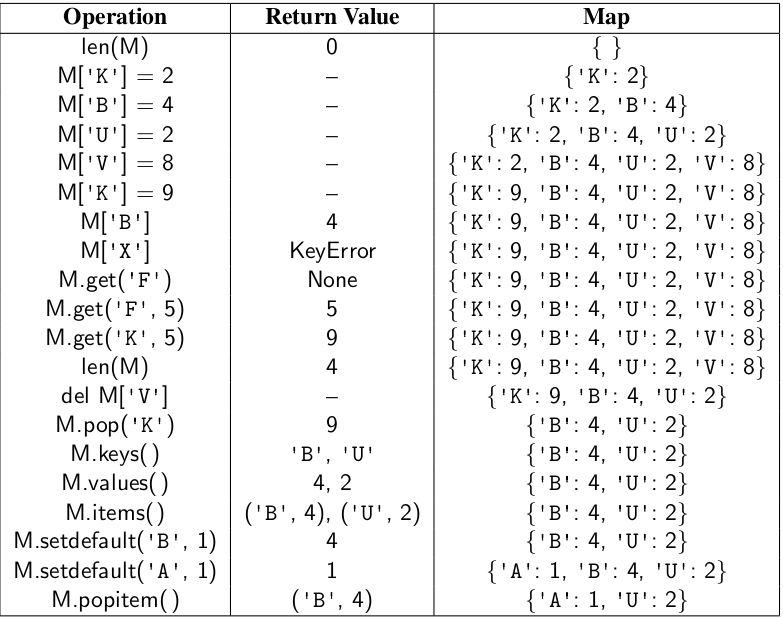

<h6> Application <h6>

` A program for counting letter frequencies in a document, and
reporting the most frequent letter. `

In [1]:
file = open("LICENSE.txt", "r", errors ='ignore')
charcount = {} 
validchars = "abcdefghijklmnopqrstuvwxyz" 

for i in range(97,123): # lowercase rangr
    c = (chr(i)) # the chars a-z
    charcount[c] = 0 
for line in file:
    words = line.split(" ") # line into words
    for word in words:  # words into chars
      chars = list(word) #convert word into a char list
      for c in chars:  # process chars
        if c.isalpha():  # only alpha allowd
            if c.isupper():
                c = c.lower()  # if char is upper convert to lower
            if c in validchars: # if in valid char set
                  charcount[c] += 1 #  count ++
print(charcount) 
 
file.close() 

{'a': 673, 'b': 131, 'c': 287, 'd': 268, 'e': 978, 'f': 186, 'g': 142, 'h': 296, 'i': 607, 'j': 11, 'k': 40, 'l': 292, 'm': 231, 'n': 533, 'o': 653, 'p': 216, 'q': 12, 'r': 517, 's': 449, 't': 815, 'u': 205, 'v': 52, 'w': 83, 'x': 23, 'y': 176, 'z': 1}


<h6> Implementation <h6>

In [7]:
from collections.abc import Mapping, MutableMapping

In [11]:
class MapBase(MutableMapping):
    class _Item:
        __slots__ = '_key' , '_value'
        
    def __init__(self, k, v):
        self._key = k
        self._value = v
    
    def __eq__(self, other):
        return self._key == other._key
    
    def __ne__(self,other):
        return not (self == other)
    
    def __It__(self, other):
        return self._key < other._key

In [12]:
class UnsortedTableMap(MapBase):
    def __init__(self):
        self._table = []
        
    def __getitem__(self, k):
        for item in self._table:
            if k == item._key:
                return item._value
        raise KeyError('Key Error: '+ repr(k))
    
    def __setitem__(self, k, v):
        for item in self._table:
            if k == item._key:
                item._value = v
                return
        self._table.append(self._Item(k,v))    
    
    def __delitem__(self, k):
        for j in range(len(self._table)):
            if k == self._table[j]._key:
                self._table.pop(j)
                return
        raise KeyError( 'Key Error:' + repr(k))
    
    def __len__(self):
        return len(self._table)
    
    def __iter__(self):
        for item in self._table:
            yield item._key

<h1 style='color:green' > Hash Tables<h1>

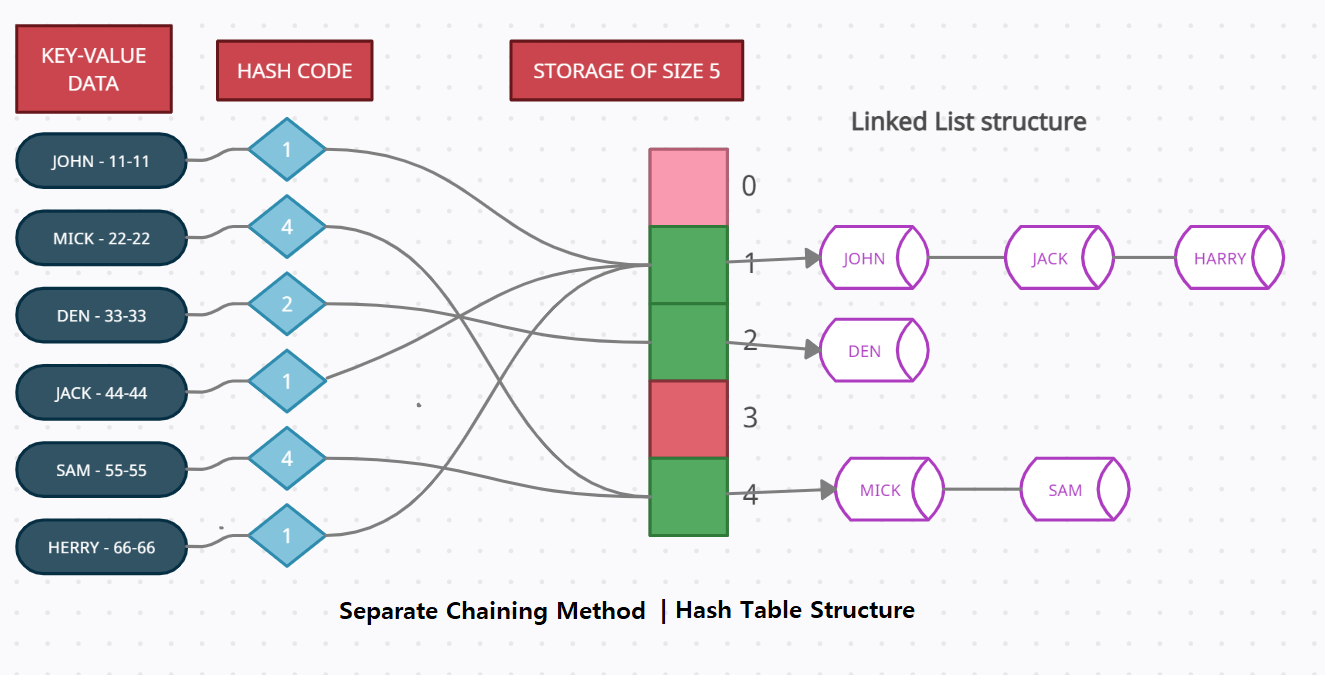

<h6> Hash function <h6>

The goal of a <b>hash function</b>, h, is to map each key k to an integer in the range
[0, N − 1], where N is the capacity of the bucket array for a hash table. Equipped
with such a hash function, h, the main idea of this approach is to use the hash
function value, h(k), as an index into our bucket array, A, instead of the key k
(which may not be appropriate for direct use as an index). That is, we store the
item (k, v) in the bucket A[h(k)].

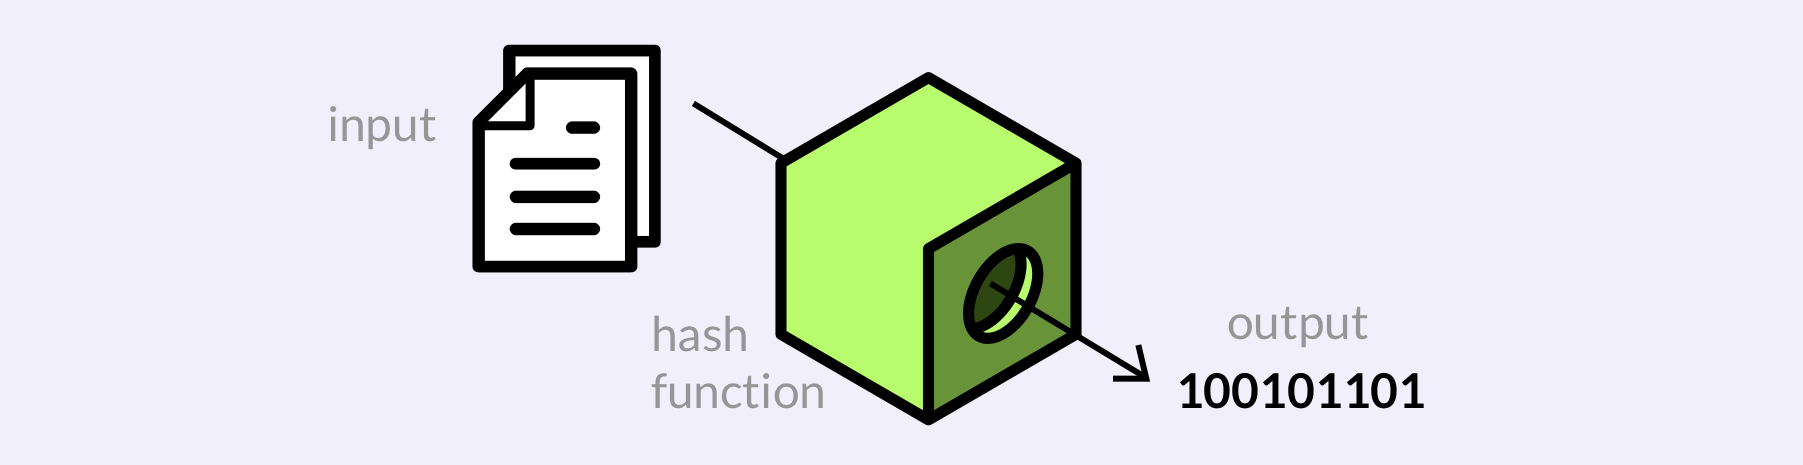

The ﬁrst action that a hash function performs is to take an arbitrary key k in our
map and compute an integer that is called the <b>hash code</b> for k; this integer need not
be in the range [0, N − 1], and may even be negative. We desire that the set of hash
codes assigned to our keys should avoid collisions as much as possible.

<h6> Implementation <h6>

In [15]:
class HashTable:  
    def __init__(self):
        self.MAX = 30
        self.arr = [[] for i in range(self.MAX)]
        
    def get_hash(self, key):
        hash = 0
        for char in key:
            hash += ord(char)
        return hash % self.MAX
    
    def __getitem__(self, index):
        h = self.get_hash(index)
        return self.arr[h]
    
    def __setitem__(self, key, val):
        h = self.get_hash(key)
        self.arr[h] = val    
        
    def __delitem__(self, key):
        h = self.get_hash(key)
        self.arr[h] = None    

In [16]:
t = HashTable()
t["march 6"] = 310
t["march 7"] = 420

In [17]:
t.arr

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 310,
 420,
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [18]:
del t["march 6"]

In [19]:
t.arr

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 None,
 420,
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

<h6 style='color:purple'> Hash Table Collision Handling Using Chaining<h6>

In [20]:
class HashTable:  
    def __init__(self):
        self.MAX = 10
        self.arr = [[] for i in range(self.MAX)]
        
    def get_hash(self, key):
        hash = 0
        for char in key:
            hash += ord(char)
        return hash % self.MAX
    
    def __getitem__(self, key):
        arr_index = self.get_hash(key)
        for kv in self.arr[arr_index]:
            if kv[0] == key:
                return kv[1]
            
    def __setitem__(self, key, val):
        h = self.get_hash(key)
        found = False
        for idx, element in enumerate(self.arr[h]):
            if len(element)==2 and element[0] == key:
                self.arr[h][idx] = (key,val)
                found = True
        if not found:
            self.arr[h].append((key,val))
        
    def __delitem__(self, key):
        arr_index = self.get_hash(key)
        for index, kv in enumerate(self.arr[arr_index]):
            if kv[0] == key:
                print("del",index)
                del self.arr[arr_index][index]

In [21]:
t = HashTable()
t["march 6"] = 310
t["march 7"] = 420
t["march 8"] = 67
t["march 17"] = 63457

In [22]:
t["march 6"]

310

In [23]:
t.arr

[[('march 7', 420)],
 [('march 8', 67)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [('march 6', 310), ('march 17', 63457)]]

In [24]:
t["march 6"] = 11

In [25]:
t.arr

[[('march 7', 420)],
 [('march 8', 67)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [('march 6', 11), ('march 17', 63457)]]

In [26]:
del t["march 6"]

del 0


In [27]:
t.arr

[[('march 7', 420)],
 [('march 8', 67)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [('march 17', 63457)]]